# QuickGuide for Text analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install Colab selenium & crome driver

In [1]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U mkt-retv

## Env 세팅

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pathlib import Path
import pandas as pd
# from google.colab import files
from market_research.analysis import SentiGPT
from market_research.analysis import TextAnalysis

### 분석 폴더
- `input`에 파일을 넣어주세요.

## 준비

## Text 분석

In [2]:
tas = TextAnalysis()

In [6]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path

[WindowsPath('input/19q1_qa.pdf'),
 WindowsPath('input/19q2_qa.pdf'),
 WindowsPath('input/19q3_qa.pdf'),
 WindowsPath('input/19q4_qa.pdf'),
 WindowsPath('input/20q1_qa.pdf'),
 WindowsPath('input/20q2_qa.pdf'),
 WindowsPath('input/20q3_qa.pdf'),
 WindowsPath('input/20q4_qa.pdf'),
 WindowsPath('input/21q1_qa.pdf'),
 WindowsPath('input/21q2_qa.pdf'),
 WindowsPath('input/21q3_qa.pdf'),
 WindowsPath('input/21q4_qa.pdf'),
 WindowsPath('input/22q1_qa.pdf'),
 WindowsPath('input/22q2_qa.pdf'),
 WindowsPath('input/22q3_qa.pdf'),
 WindowsPath('input/22q4_qa.pdf'),
 WindowsPath('input/23q1_qa.pdf'),
 WindowsPath('input/23q2_qa.pdf')]

In [7]:
filtering_cutoff = 14

['segment' 'quarter' 'sales' 'statements' 'business' 'question' 'yen'
 'inventory' 'capacity' 'demand' 'year' 'sony' 'results' 'impact']

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



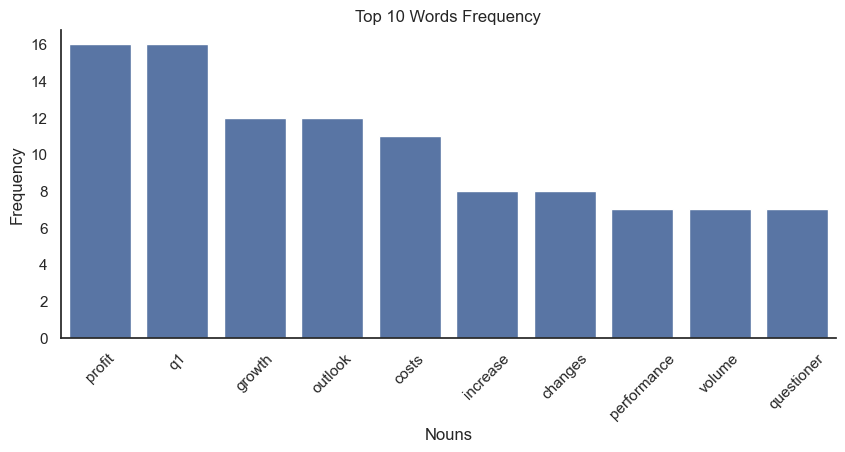

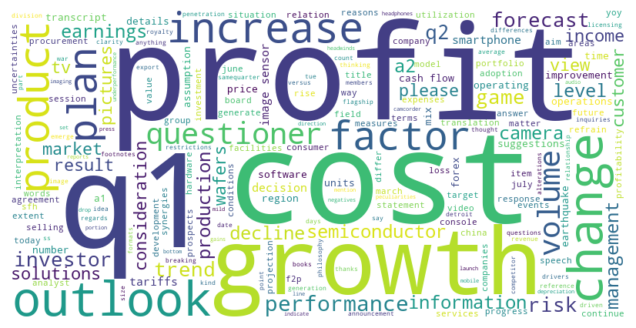


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



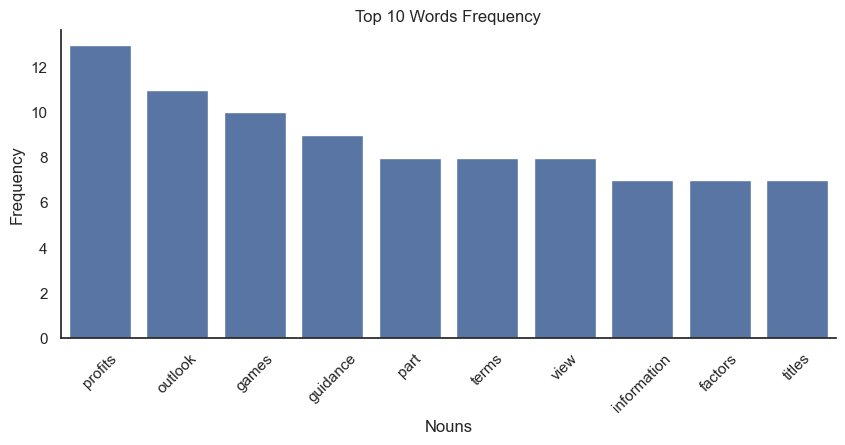

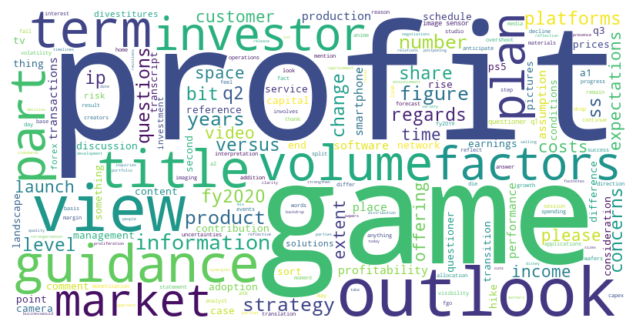


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



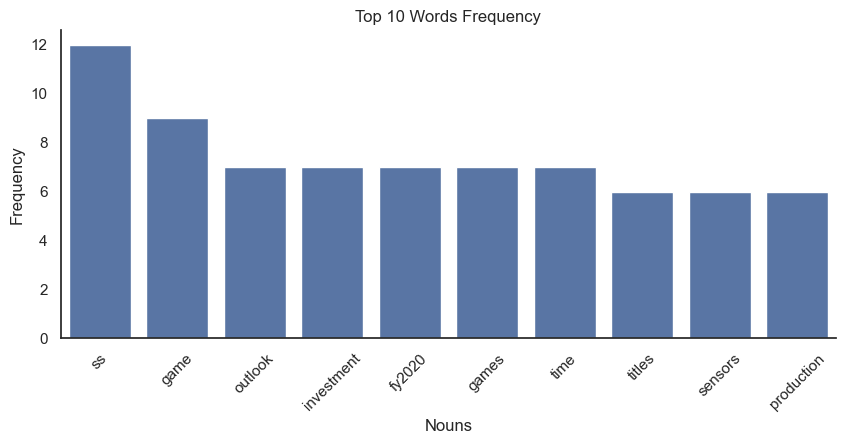

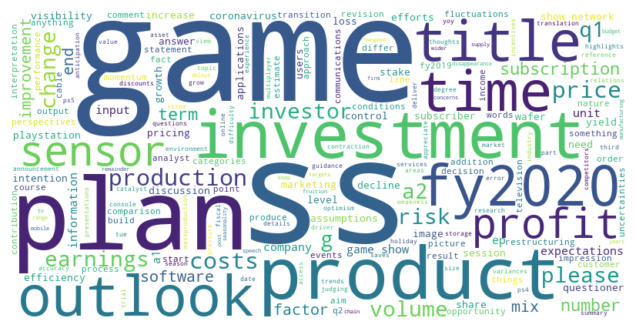


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



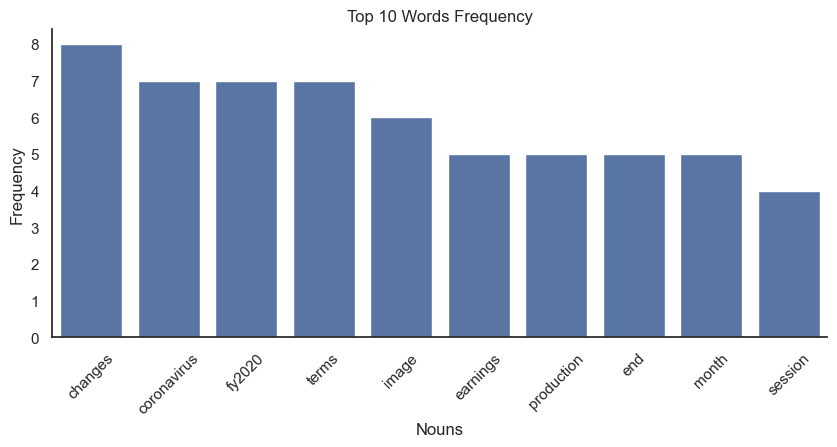

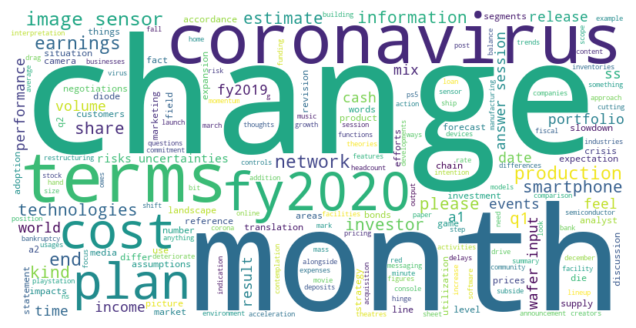


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



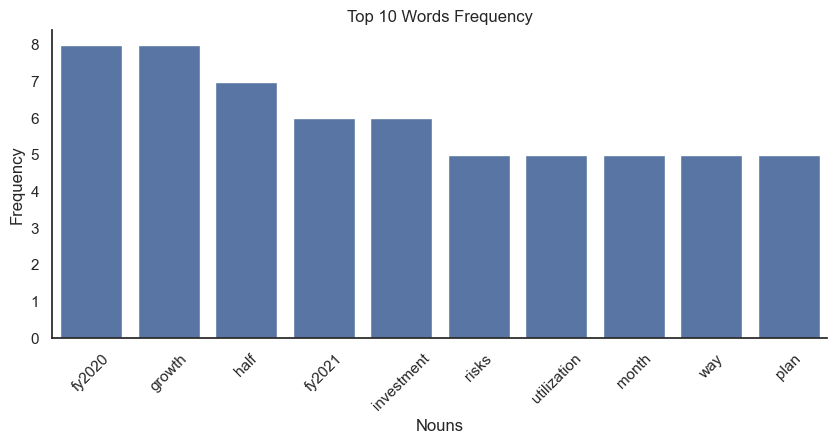

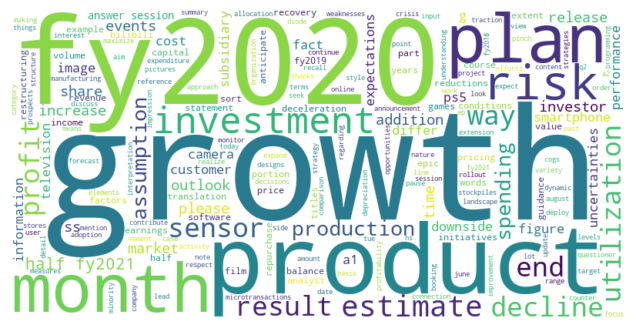


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



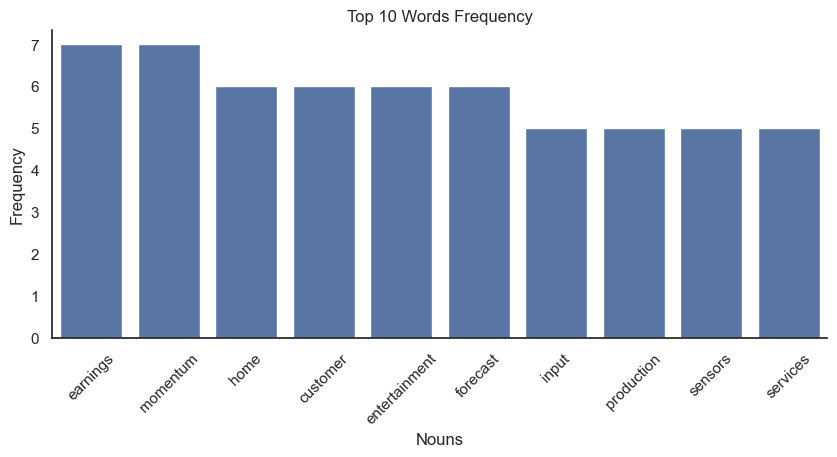

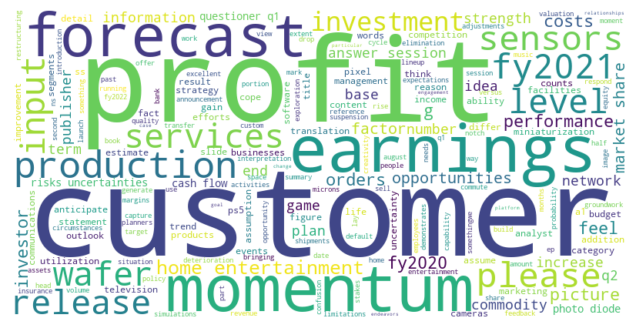


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



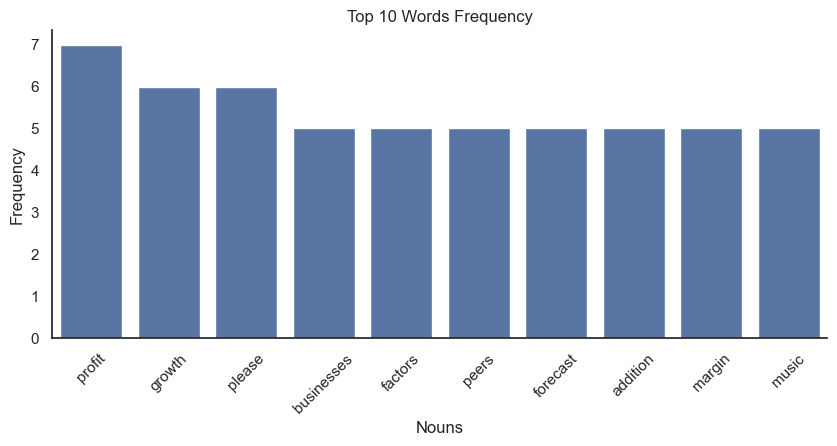

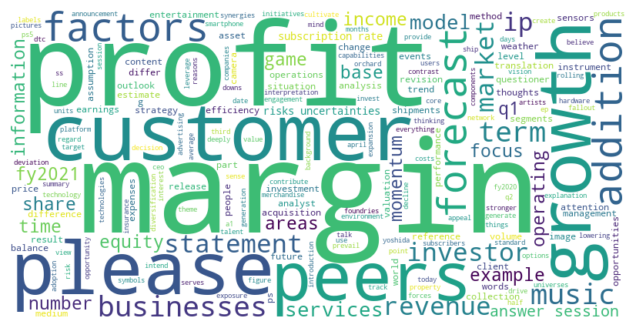


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



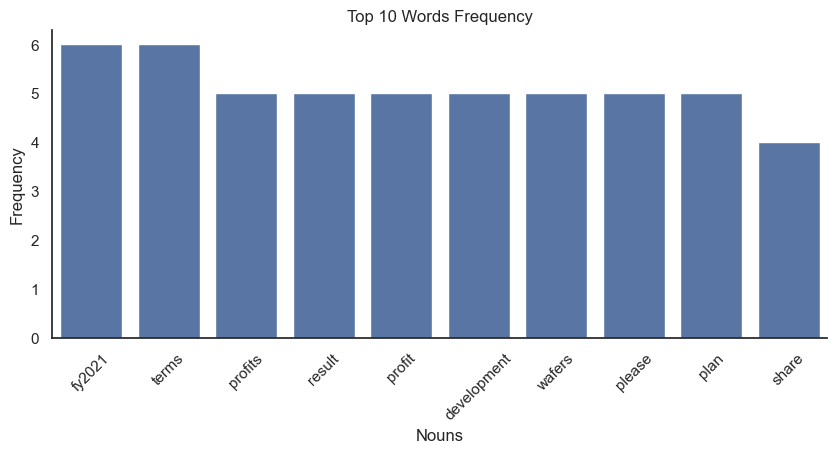

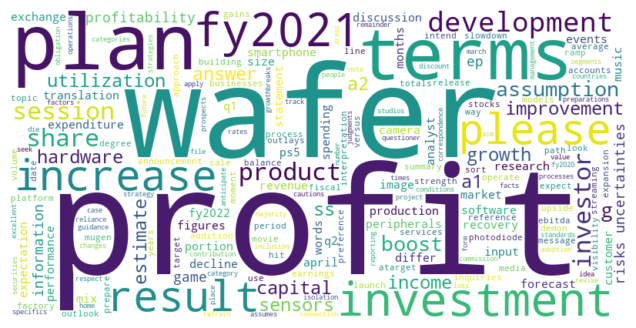


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



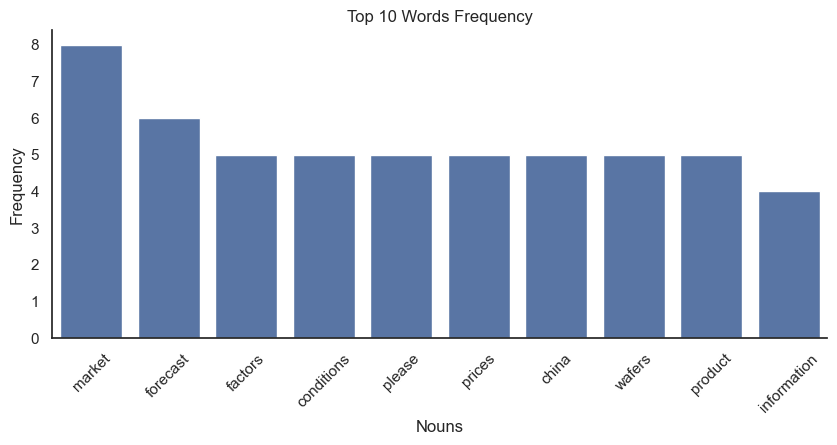

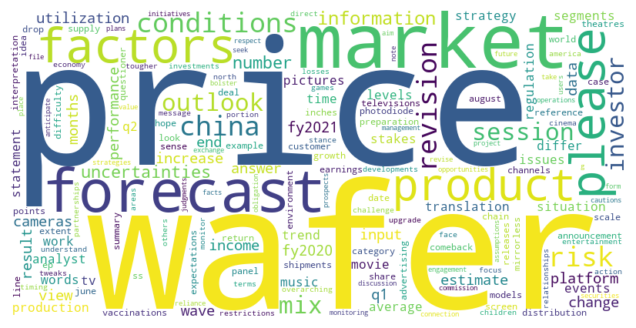


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



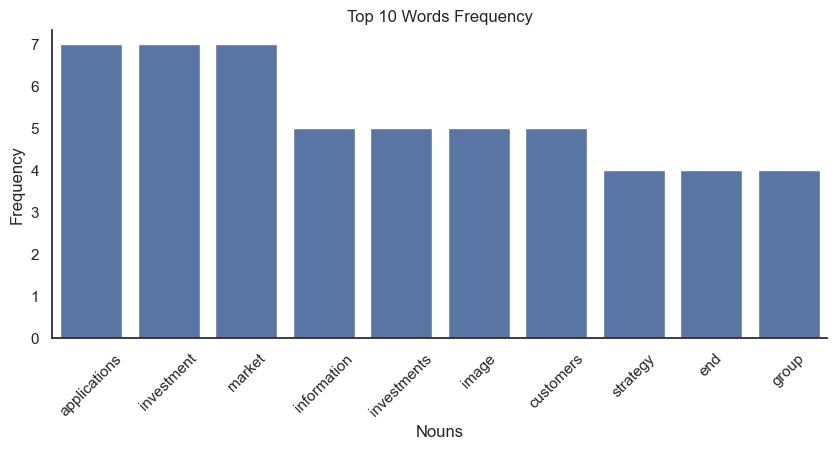

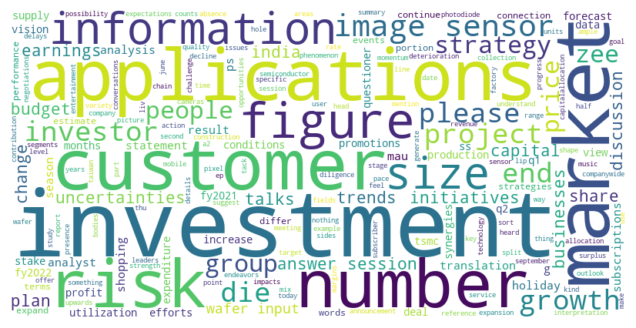


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



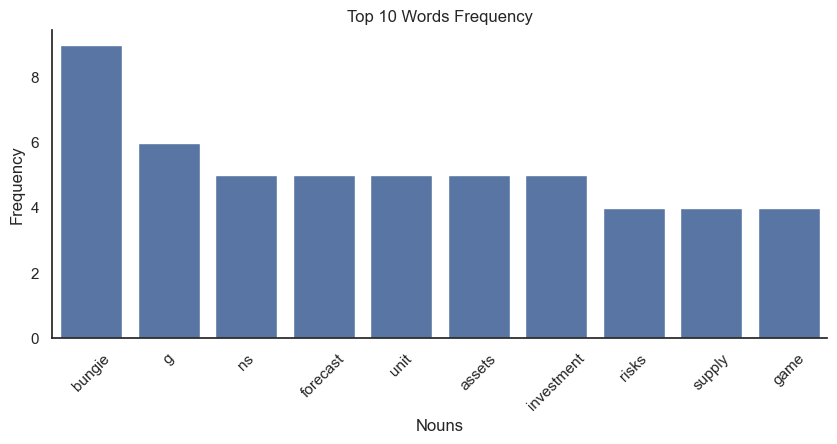

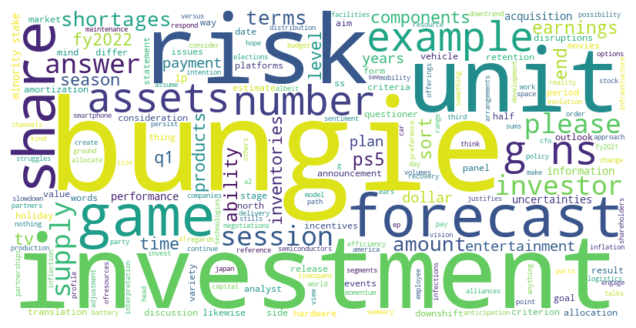


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



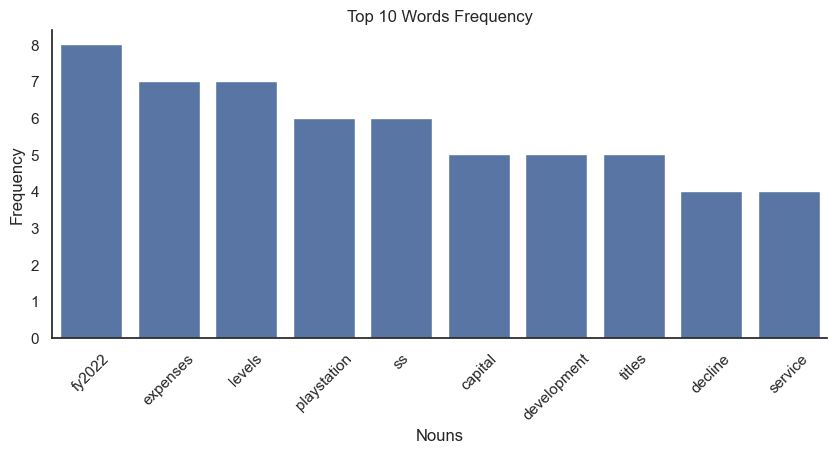

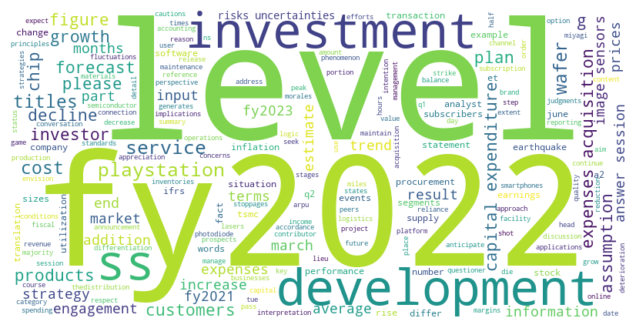


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



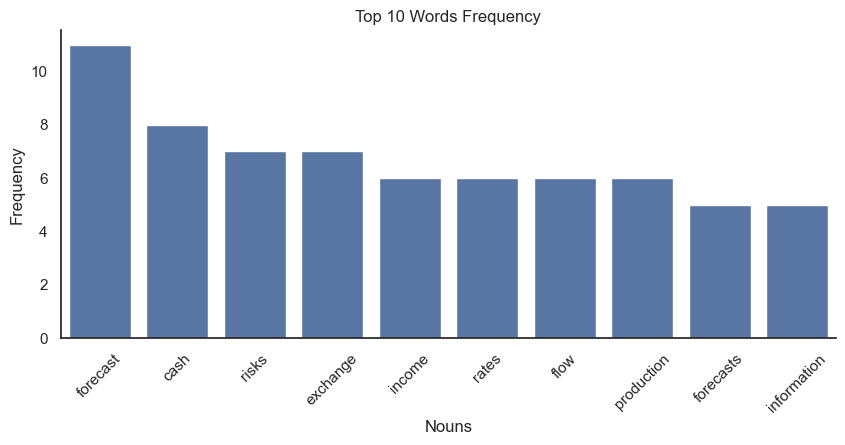

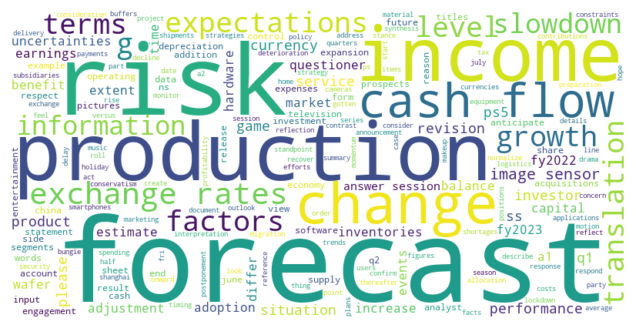


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



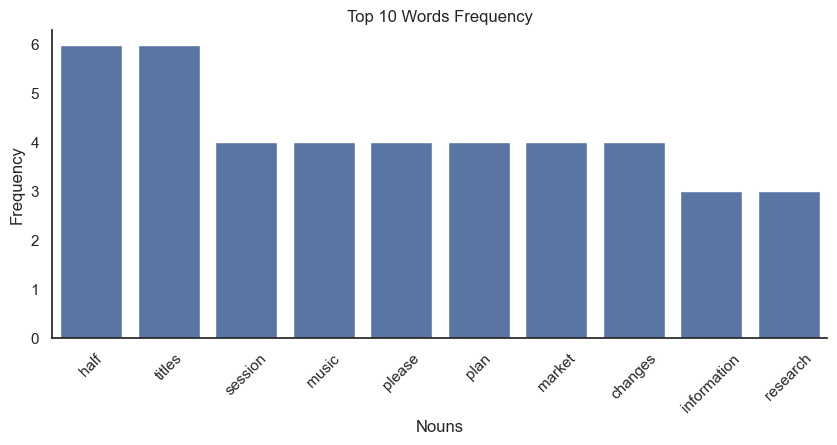

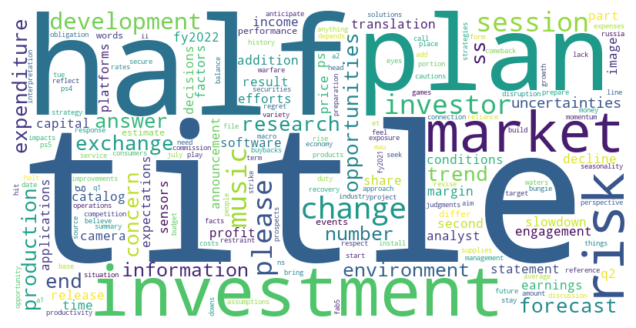


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



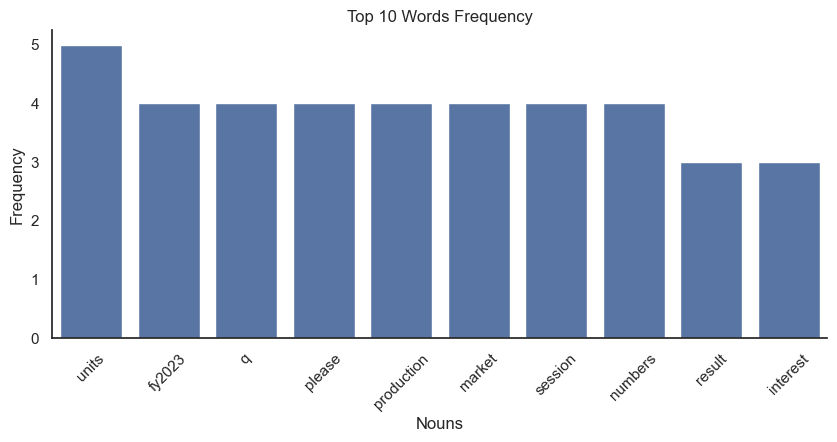

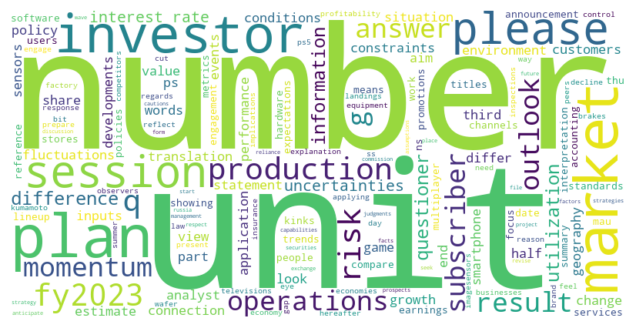


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



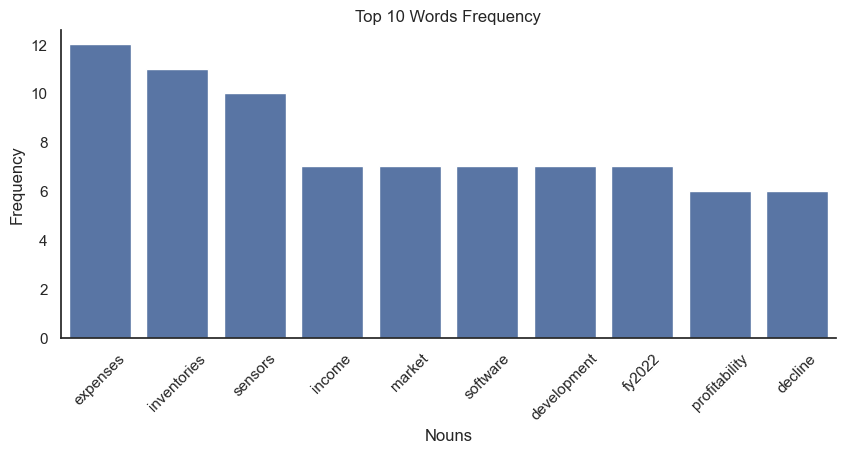

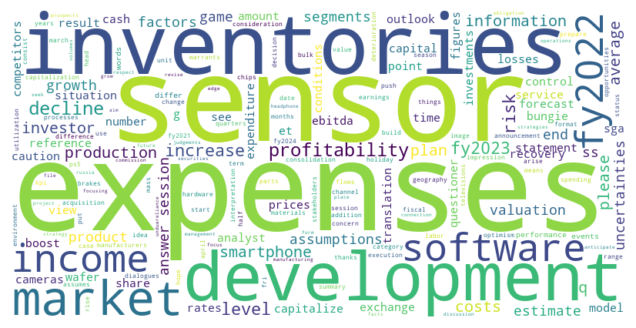


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



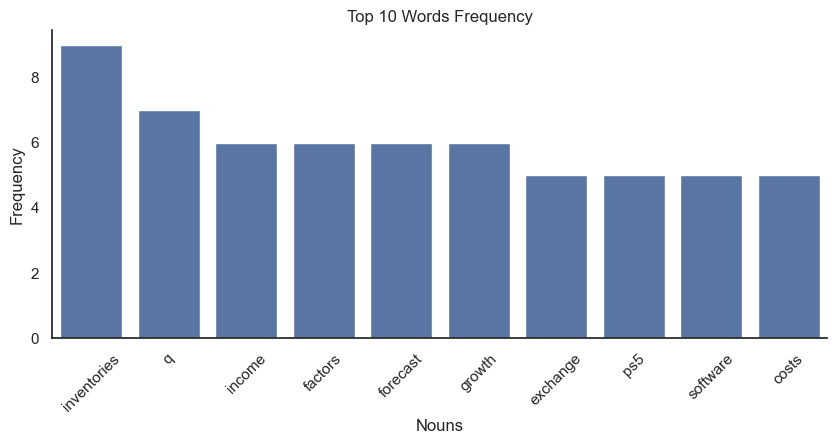

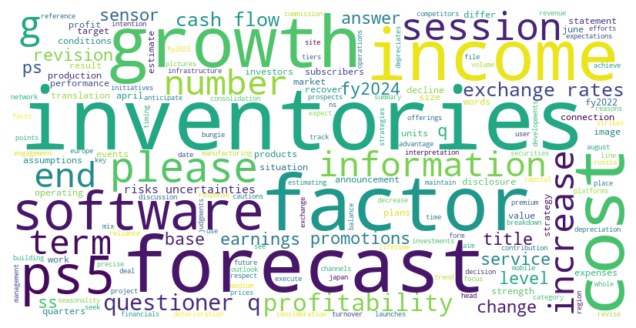


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■



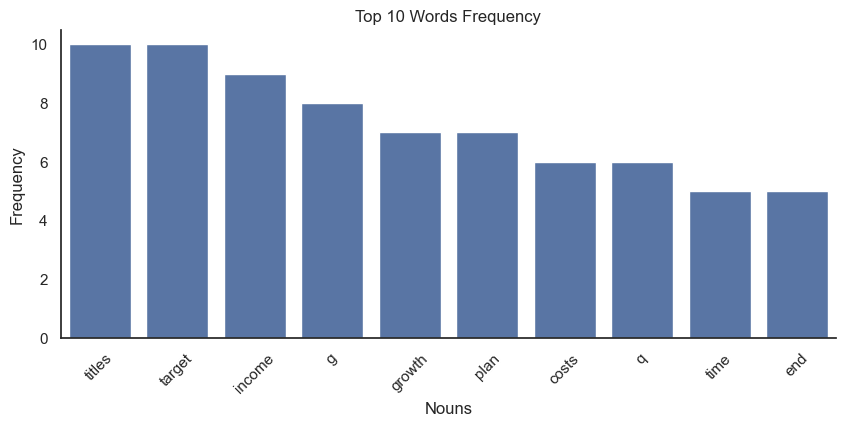

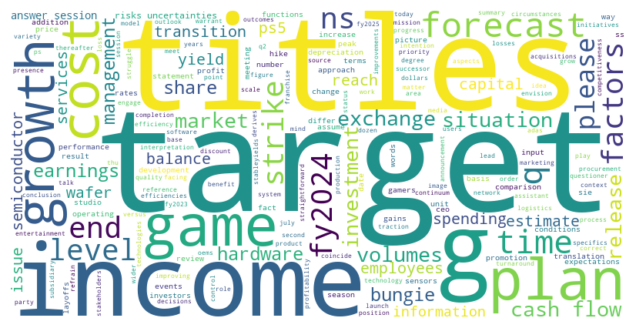

In [8]:
comments = [tas.pdf_to_text(file_path) for file_path in files_path]
all_comments = [] 
all_comments.extend(comment for comment in comments)

tas.get_comments(all_comments, [])
cleaning_words = tas.df_word_freq.head(filtering_cutoff).Nouns.values
print(cleaning_words)
for comment in comments:
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    tas.get_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()
    

---

In [32]:
for excel_file in excel_files:
    file_name=excel_file.name.split(".")[0]
    output_file_path = output_folder/file_name
    
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■[{file_name}]■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded

    #text 읽기
    comments = [sentence for sentence in df_uploaded["sentences"]]
    tas.get_comments(comments)
    tas.save_df_freq_as_excel(output_file_path, file_name)

    #그래프 만들기
    tas.plot_freq()
    tas.plot_wordcloud()

- colab에서 파일 받기

In [ ]:
!zip -r /content/results_text.zip /content/results_text/
files.download('/content/results_text.zip')

## sentgpt: Fine tune 필요

### GPT setting
- [GPT model info](https://platform.openai.com/docs/models/continuous-model-upgrades)

In [14]:
API_KEY = 
gpt_model="gpt-3.5-turbo-1106"

In [8]:
stm = SentiGPT(api_key=API_KEY, gpt_model=gpt_model)

In [10]:
for excel_file in excel_files:
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded
    
    # GPT 분석
    sentences_list = [sentence for sentence in df_sentences["sentences"]]  # 리스트로 변환
    keywords_list=["brightness", "color", "contrast", "reflection", "viewing angle"]
    analyzed_results_df = stm.analyze_sentences(sentences_list, keywords_list)
    
    # 분석 파일 저장
    file_name=excel_file_path.name.split(".")[0]
    output_file_path = output_folder/file_name
 
    if not output_file_path.exists():
        output_file_path.mkdir(parents=True, exist_ok=True)
    analyzed_results_df.to_csv(output_file_path / f"analyzed_results_{file_name}.csv", index=False, encoding='utf-8')
    
    #그래프 만들기
    # df_analyzed_results = analyzed_results_df - 5  #그래프 범위 조정
    print(f"{file_name}, Plot")
    stm.plot_hist_all(output_folder=output_file_path, file_name=file_name)
    stm.plot_hist_each(output_folder=output_file_path, file_name=file_name)

---